<a href="https://colab.research.google.com/github/bogatovam/nlp-labs/blob/main/NLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Dataset

In [1]:
!pip install --upgrade nltk gensim==3.8.0 bokeh unidecode contractions --q

     |████████████████████████████████| 1.5 MB 4.3 MB/s 
     |████████████████████████████████| 24.2 MB 1.6 MB/s 
     |████████████████████████████████| 18.5 MB 811 kB/s 
     |████████████████████████████████| 235 kB 50.0 MB/s 
     |████████████████████████████████| 749 kB 48.0 MB/s 
     |████████████████████████████████| 284 kB 49.7 MB/s 
     |████████████████████████████████| 321 kB 47.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you have bokeh 2.4.2 which is incompatible.


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

In [3]:
dataset_dict = tfds.load('ted_hrlr_translate/ru_to_en',shuffle_files=True)
train_tfds, test_tfds = dataset_dict['train'], dataset_dict['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ted_hrlr_translate/ru_to_en/1.0.0.incompleteUUA6TZ/ted_hrlr_translate-train.tfrecord


  0%|          | 0/208106 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ted_hrlr_translate/ru_to_en/1.0.0.incompleteUUA6TZ/ted_hrlr_translate-validation.tfrecord


  0%|          | 0/4805 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ted_hrlr_translate/ru_to_en/1.0.0.incompleteUUA6TZ/ted_hrlr_translate-test.tfrecord


  0%|          | 0/5476 [00:00<?, ? examples/s]

Dataset ted_hrlr_translate downloaded and prepared to /root/tensorflow_datasets/ted_hrlr_translate/ru_to_en/1.0.0. Subsequent calls will reuse this data.


In [4]:
dataset_dict

{'test': <_OptionsDataset shapes: {en: (), ru: ()}, types: {en: tf.string, ru: tf.string}>,
 'train': <_OptionsDataset shapes: {en: (), ru: ()}, types: {en: tf.string, ru: tf.string}>,
 'validation': <_OptionsDataset shapes: {en: (), ru: ()}, types: {en: tf.string, ru: tf.string}>}

In [5]:
train_np = []
test_np = []

for a in tfds.as_numpy(train_tfds):
  train_np.append([a['ru'].decode('utf-8'), a['en'].decode('utf-8')])

for a in tfds.as_numpy(test_tfds):
  test_np.append([a['ru'].decode('utf-8'), a['en'].decode('utf-8')])

train_np = np.asarray(train_np)
test_np = np.asarray(test_np)

In [6]:
train_np.shape, test_np.shape

((208106, 2), (5476, 2))

In [7]:
train_np[:10]

array([['к : успех , перемены возможны только с оружием в руках .',
        'c : success , the change is only coming through the barrel of the gun .'],
       ['документация и методика практического обучения также доступна и выпущена creative commons .',
        'the documentation and the hands-on teaching methodology is also open-source and released as the creative commons .'],
       ['( видео ) диди пиклз : сейчас четыре часа утра .',
        "( video ) didi pickles : it 's four o'clock in the morning ."],
       ['( смех ) так что теперь я могу прибирать картины , с которыми уже давно хотел это сделать .',
        "( laughter ) so now i 've been able to tidy up pictures that i 've wanted to tidy up for a long time ."],
       ['часть света , который излучает земля , поглощается дырой , но часть его как бы огибает ее и возвращается обратно к нам .',
        'the light from the earth , some of it falls in , but some of it gets lensed around and brought back to us .'],
       ['специа

In [8]:
from bs4 import BeautifulSoup
import unidecode
import contractions
import nltk
import re

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text(separator=" ")

def remove_accented_chars(text):
    return unidecode.unidecode(text)

def lower(text):
    return text.lower()

def remove_special_characters(text):
    pattern=r'[^a-zA-zа-яА-Я0-9\s]'
    return re.sub(pattern,'',text)

In [9]:
def preprocess_text(text):
  text = remove_html_tags(text)
  text = lower(text)
  
  text = remove_special_characters(text)
  return text

In [10]:
for pair in train_np:
  pair[0] = preprocess_text(pair[0])
  pair[1] = preprocess_text(pair[1])

for pair in test_np:
  pair[0] = preprocess_text(pair[0])
  pair[1] = preprocess_text(pair[1])

In [11]:
train_np[:10]

array([['к  успех  перемены возможны только с оружием в руках ',
        'c  success  the change is only coming through the barrel of the gun '],
       ['документация и методика практического обучения также доступна и выпущена creative commons ',
        'the documentation and the handson teaching methodology is also opensource and released as the creative commons '],
       [' видео  диди пиклз  сейчас четыре часа утра ',
        ' video  didi pickles  it s four oclock in the morning '],
       [' смех  так что теперь я могу прибирать картины  с которыми уже давно хотел это сделать ',
        ' laughter  so now i ve been able to tidy up pictures that i ve wanted to tidy up for a long time '],
       ['часть света  который излучает земля  поглощается дырой  но часть его как бы огибает ее и возвращается обратно к нам ',
        'the light from the earth  some of it falls in  but some of it gets lensed around and brought back to us '],
       ['специалисты спорили о написании термина ',

### 2. SMT (IBM models)

In [18]:
from nltk.translate import AlignedSent, Alignment, IBMModel, IBMModel1, IBMModel2
from nltk.translate.ibm_model import Counts

In [19]:
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()

def tokenize(text):
   return tokenizer.tokenize(text)

In [20]:
bitext = []

max_size = 110000
for pair in train_np:
  aligned_sent = AlignedSent(tokenize(pair[0]), tokenize(pair[1]))
  bitext.append(aligned_sent)
  if len(bitext) > max_size:
    break

In [21]:
test_bitext = []
for pair in test_np:
  aligned_sent = AlignedSent(tokenize(pair[0]), tokenize(pair[1]))
  test_bitext.append(aligned_sent)

In [79]:
ibm2 = IBMModel2(bitext, 5)

In [80]:
max(ibm2.translation_table['привет'], key=ibm2.translation_table['привет'].get)

'hi'

In [81]:
ibm2.translation_table['привет']['hi']

0.7086649976380199

In [82]:
from gensim.models import Word2Vec
import gensim.downloader as api

w2v_model = api.load('glove-twitter-100')

In [83]:
def w2v_transform(sentence):
  row_words = []
  for word in sentence:
      try:
          vector = w2v_model.get_vector(word)
          row_words.append(vector)
      except Exception as e:
          continue
  if len(row_words) ==  0:
      return np.zeros(shape = (100))
  else:
      return np.array(row_words).mean(axis = 0)

In [84]:
def get_ibm_translation(sentence):
  result = []
  for word in sentence:
    if ibm2.translation_table[word]:
      word_translation = max(ibm2.translation_table[word], key=ibm2.translation_table[word].get)
      result.append(word_translation)
  return result

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

errors = []
bleu_scores = []
for pair in test_np:
  tokenized_source = tokenize(pair[0])
  tokenized_groundtruth = tokenize(pair[1])

  source = w2v_transform(tokenized_source)
  groundtruth = w2v_transform(tokenized_groundtruth)

  tokenized_translation = get_ibm_translation(tokenized_source)
  translation = w2v_transform(tokenized_translation)

  errors.append(np.linalg.norm(groundtruth - translation))
  bleu_scores.append(sentence_bleu([tokenized_groundtruth], tokenized_translation))


In [86]:
np.mean(errors), np.mean(bleu_scores)

(3.011943962432874, 0.0022947436419285287)

Эта модель строит таблицу перевода, а также способна предсказывать "соотношение" между словами. Однако лучшего способа перевода, чем по словам, эта модель не предлагает (по крайней мере этой версии) Поэтому результаты получаются посредственными. Однако отдельные слова она переводит неплохо.

### NMT

In [12]:
!pip install tensorflow_text -q

     |████████████████████████████████| 4.9 MB 4.1 MB/s 


In [13]:
import tensorflow_text as tf_text

def tf_lower_and_split_punct(text):
  # Split accecented characters.
  text = tf_text.normalize_utf8(text, 'NFKD')
  text = tf.strings.lower(text)
  # Add spaces around punctuation.
  text = tf.strings.regex_replace(text, '[.?!,¿]', r' \0 ')
  # Strip whitespace.
  text = tf.strings.strip(text)

  text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
  return text

Датасет уменьшается вдвое - для сокращения времени обучения.

In [14]:
# reduce dataset
train_np = train_np[:train_np.shape[0] // 2, :]

In [15]:
train_np.shape, test_np.shape

((104053, 2), (5476, 2))

In [16]:
BUFFER_SIZE = len(train_np)
BATCH_SIZE = 128
max_vocab_size = 5000

train_tf_dataset = tf.data.Dataset.from_tensor_slices((train_np[:, 0], train_np[:, 1])).shuffle(BUFFER_SIZE)
train_tf_dataset = train_tf_dataset.batch(BATCH_SIZE)

test_tf_dataset = tf.data.Dataset.from_tensor_slices((test_np[:, 0], test_np[:, 1])).shuffle(BUFFER_SIZE)
test_tf_dataset = test_tf_dataset.batch(BATCH_SIZE)

input_text_processor = tf.keras.layers.TextVectorization(standardize=tf_lower_and_split_punct, max_tokens=max_vocab_size)
input_text_processor.adapt(train_np[:, 0])

output_text_processor = tf.keras.layers.TextVectorization(standardize=tf_lower_and_split_punct, max_tokens=max_vocab_size)
output_text_processor.adapt(train_np[:, 1])

#### Seq2Seq

In [143]:
  class Encoder(tf.keras.layers.Layer):
    def __init__(self, input_vocab_size, embedding_dim, enc_units):
      super(Encoder, self).__init__()
      self.enc_units = enc_units
      self.input_vocab_size = input_vocab_size

      self.embedding = tf.keras.layers.Embedding(self.input_vocab_size, embedding_dim)

      self.gru = tf.keras.layers.GRU(self.enc_units,
                                     return_sequences=True,
                                     return_state=True,
                                     recurrent_initializer='glorot_uniform')

    def call(self, tokens, state=None):
      vectors = self.embedding(tokens)
      output, state = self.gru(vectors, initial_state=state)

      return output, state

In [144]:
class Attention(tf.keras.layers.Layer):
  def __init__(self, units):
    super().__init__()
    self.W1 = tf.keras.layers.Dense(units, use_bias=False)
    self.W2 = tf.keras.layers.Dense(units, use_bias=False)

    self.attention = tf.keras.layers.AdditiveAttention()

  def call(self, query, value, mask):
    w1_query = self.W1(query)
    w2_key = self.W2(value)

    query_mask = tf.ones(tf.shape(query)[:-1], dtype=bool)
    value_mask = mask

    context_vector, attention_weights = self.attention(
        inputs = [w1_query, value, w2_key],
        mask=[query_mask, value_mask],
        return_attention_scores = True,
    )

    return context_vector, attention_weights

In [145]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, output_vocab_size, embedding_dim, dec_units):
    super(Decoder, self).__init__()
    self.dec_units = dec_units
    self.output_vocab_size = output_vocab_size
    self.embedding_dim = embedding_dim

    self.embedding = tf.keras.layers.Embedding(self.output_vocab_size,
                                               embedding_dim)

    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

    self.attention = Attention(self.dec_units)

    self.Wc = tf.keras.layers.Dense(dec_units, activation=tf.math.tanh,
                                    use_bias=False)

    self.fc = tf.keras.layers.Dense(self.output_vocab_size)

  def call(self, new_tokens, enc_output, mask, state=None):

    vectors = self.embedding(new_tokens)

    rnn_output, state = self.gru(vectors, initial_state=state)

    context_vector, attention_weights = self.attention(query=rnn_output, value=enc_output, mask=mask)

    context_and_rnn_output = tf.concat([context_vector, rnn_output], axis=-1)

    attention_vector = self.Wc(context_and_rnn_output)

    logits = self.fc(attention_vector)

    return logits, attention_weights, state

In [146]:
class MaskedLoss(tf.keras.losses.Loss):
  def __init__(self):
    self.name = 'masked_loss'
    self.loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')

  def __call__(self, y_true, y_pred):
    loss = self.loss(y_true, y_pred)
    mask = tf.cast(y_true != 0, tf.float32)
    loss *= mask
    return tf.reduce_sum(loss)

In [147]:
class Seq2SeqTranslator(tf.keras.Model):
  def __init__(self, embedding_dim, units,
               input_text_processor,
               output_text_processor, 
               use_tf_function=True):
    super().__init__()
    encoder = Encoder(input_text_processor.vocabulary_size(),
                      embedding_dim, units)
    decoder = Decoder(output_text_processor.vocabulary_size(),
                      embedding_dim, units)

    self.encoder = encoder
    self.decoder = decoder
    self.input_text_processor = input_text_processor
    self.output_text_processor = output_text_processor
    self.use_tf_function = use_tf_function

  def train_step(self, inputs):
    if self.use_tf_function:
      return self._tf_train_step(inputs)
    else:
      return self._train_step(inputs)

  def call(self, inputs):
    if self.use_tf_function:
      return self._tf_train_step(inputs)
    else:
      return self._train_step(inputs)

  def _preprocess(self, input_text, target_text):

    input_tokens = self.input_text_processor(input_text)
    target_tokens = self.output_text_processor(target_text)

    input_mask = input_tokens != 0
    target_mask = target_tokens != 0

    return input_tokens, input_mask, target_tokens, target_mask

  @tf.function(input_signature=[[tf.TensorSpec(dtype=tf.string, shape=[None]),
                               tf.TensorSpec(dtype=tf.string, shape=[None])]])
  def _tf_train_step(self, inputs):
    return self._train_step(inputs)

  def _train_step(self, inputs):
    input_text, target_text = inputs  

    input_tokens, input_mask, target_tokens, target_mask = self._preprocess(input_text, target_text)

    max_target_length = tf.shape(target_tokens)[1]
    
    with tf.GradientTape() as tape:
      enc_output, enc_state = self.encoder(input_tokens)
      dec_state = enc_state
      loss = tf.constant(0.0)

      for t in tf.range(max_target_length-1):
        new_tokens = target_tokens[:, t:t+2]
        step_loss, dec_state = self._loop_step(new_tokens, input_mask,
                                               enc_output, dec_state)
        loss = loss + step_loss

      average_loss = loss / tf.reduce_sum(tf.cast(target_mask, tf.float32))

    variables = self.trainable_variables 
    gradients = tape.gradient(average_loss, variables)
    self.optimizer.apply_gradients(zip(gradients, variables))

    return {'batch_loss': average_loss}

  def _loop_step(self, new_tokens, input_mask, enc_output, dec_state):
    input_token, target_token = new_tokens[:, 0:1], new_tokens[:, 1:2]

    logits, attention_weights, dec_state = self.decoder(new_tokens=input_token,
                                 enc_output=enc_output,
                                 mask=input_mask,
                                 state=dec_state)

    y = target_token
    y_pred = logits
    step_loss = self.loss(y, y_pred)

    return step_loss, dec_state


  def test_step(self, inputs):
    return self._testtt(inputs)

  @tf.function()
  def _testtt(self, inputs):
    input_text, target_text = inputs  
    
    input_tokens, input_mask, target_tokens, target_mask = self._preprocess(input_text, target_text)
    max_target_length = tf.shape(target_tokens)[1]
    
    enc_output, enc_state = self.encoder(input_tokens)
    dec_state = enc_state
    loss = tf.constant(0.0)

    for t in tf.range(max_target_length-1):
      new_tokens = target_tokens[:, t:t+2]
      step_loss, dec_state = self._loop_step(new_tokens, input_mask,
                                             enc_output, dec_state)
      loss = loss + step_loss

    average_loss = loss / tf.reduce_sum(tf.cast(target_mask, tf.float32))

    return {'batch_loss': average_loss}

In [148]:
class BatchLogs(tf.keras.callbacks.Callback):
  def __init__(self, key):
    self.key = key
    self.logs = []
    self.val_logs = []

  def on_train_batch_end(self, n, logs):
    self.logs.append(logs[self.key])

  def on_test_batch_end(self, n, val_logs):
    self.val_logs.append(val_logs[self.key])


In [149]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns           
import sklearn

def plot_loss_accuracy_metrics(loss, val_loss, name):
    fig, (ax1) = plt.subplots(nrows=1, ncols=1)
    fig.set_size_inches(20, 5)

    ax1.plot(loss)
    ax1.plot(val_loss)
    ax1.set_title('model {} batch_loss'.format(name))
    ax1.set_ylabel('batch_loss')
    ax1.set_xlabel('batch')
    ax1.legend(['train', 'val'], loc='upper left')
    plt.show()

In [150]:
def get_seq2sec_model(embedding_dim, units, input_text_processor, output_text_processor):
    translator = Seq2SeqTranslator(
        embedding_dim, units,
        input_text_processor=input_text_processor,
        output_text_processor=output_text_processor, use_tf_function=True)
    
    translator.compile(optimizer=tf.optimizers.Adam(),loss=MaskedLoss())
    return translator

In [25]:
checkpoint_folder = '/content/drive/MyDrive/nlp'

Epoch 1/3
813/813 [==============================] - 1597s 2s/step - batch_loss: 5.2289 - val_batch_loss: 4.6874
Epoch 2/3
813/813 [==============================] - 1585s 2s/step - batch_loss: 4.3689 - val_batch_loss: 3.8243
Epoch 3/3
813/813 [==============================] - 1599s 2s/step - batch_loss: 3.5744 - val_batch_loss: 3.1862
{'batch_loss': [4.672773361206055, 3.883286237716675, 3.174550771713257], 'val_batch_loss': [4.687399387359619, 3.8242928981781006, 3.1862034797668457]}


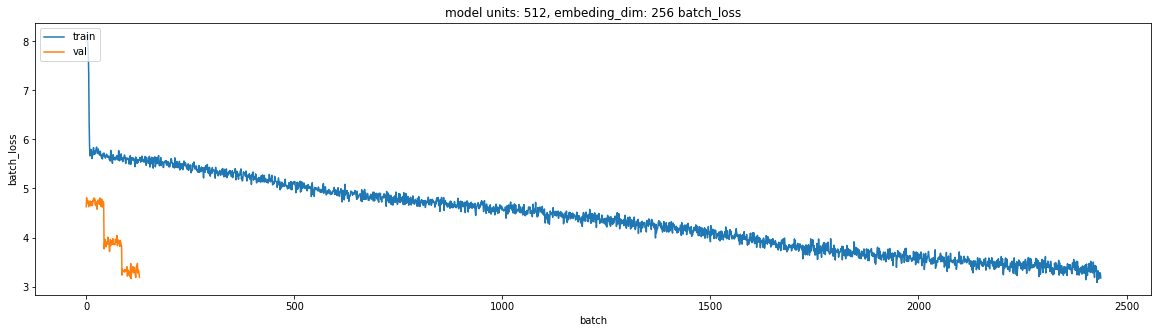

Epoch 1/3
813/813 [==============================] - 2995s 4s/step - batch_loss: 4.5839 - val_batch_loss: 3.6405
Epoch 2/3
813/813 [==============================] - 2982s 4s/step - batch_loss: 3.3709 - val_batch_loss: 3.0752
Epoch 3/3
813/813 [==============================] - 2979s 4s/step - batch_loss: 2.9241 - val_batch_loss: 2.9145
{'batch_loss': [3.816460609436035, 3.1091792583465576, 2.8736584186553955], 'val_batch_loss': [3.640535831451416, 3.075181722640991, 2.914494514465332]}


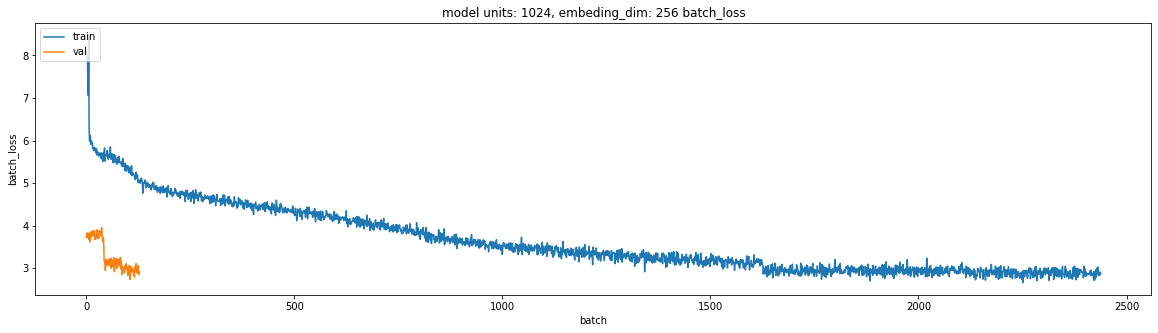

Epoch 1/3
813/813 [==============================] - 1574s 2s/step - batch_loss: 5.2072 - val_batch_loss: 4.6817
Epoch 2/3
813/813 [==============================] - 1566s 2s/step - batch_loss: 4.2822 - val_batch_loss: 3.8406
Epoch 3/3
649/813 [======================>.......] - ETA: 5:11 - batch_loss: 3.4875

In [ ]:
epochs = 3
embedding_dims = [256, 512]
units_list = [512, 1024]

for d in embedding_dims:
  for u in units_list:
    exp_name = f'units: {u}, embeding_dim: {d}'

    checkpoint_filepath = checkpoint_folder + '/cp-' + exp_name + ".ckpt"

    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        cp_dir=checkpoint_folder)
    
    batch_loss = BatchLogs('batch_loss')
    train_translator = get_seq2sec_model(d, u, input_text_processor,output_text_processor)
    history = train_translator.fit(train_tf_dataset, validation_data=test_tf_dataset, epochs=epochs, callbacks=[batch_loss,model_checkpoint_callback])
    print(history.history)
    plot_loss_accuracy_metrics(batch_loss.logs, batch_loss.val_logs, f'units: {u}, embeding_dim: {d}')

Модель хорошо обучается, но очень(!) долго. Наименьшую ошибку показала более "сложная модель" с большим количеством обучаемых параметров. 

Однако по результатам ничего осмысленного эта модель выдать не смогла. Предполагаю, что дело в недостаточном количестве эпох. 

#### Трансформер

In [16]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [17]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)

  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

  pos_encoding = angle_rads[np.newaxis, ...]

  return tf.cast(pos_encoding, dtype=tf.float32)

In [18]:
def create_padding_mask(seq):
  seq = tf.cast(tf.math.equal(seq, 0), tf.float32)

  # add extra dimensions to add the padding
  # to the attention logits.
  return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [19]:
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  # (seq_len, seq_len)

In [20]:
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  # (seq_len, seq_len)

In [21]:
def scaled_dot_product_attention(q, k, v, mask):
  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)

  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # add the mask to the scaled tensor.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)

  # softmax is normalized on the last axis (seq_len_k) so that the scores
  # add up to 1.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

In [22]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)

    self.dense = tf.keras.layers.Dense(d_model)

  def split_heads(self, x, batch_size):
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])

  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]

    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)

    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

    return output, attention_weights

In [23]:
def point_wise_feed_forward_network(d_model, dff):
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

In [24]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)

  def call(self, x, training, mask):

    attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
    attn_output = self.dropout1(attn_output, training=training)
    out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

    ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
    ffn_output = self.dropout2(ffn_output, training=training)
    out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

    return out2

In [25]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(DecoderLayer, self).__init__()

    self.mha1 = MultiHeadAttention(d_model, num_heads)
    self.mha2 = MultiHeadAttention(d_model, num_heads)

    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    self.dropout3 = tf.keras.layers.Dropout(rate)

  def call(self, x, enc_output, training,
           look_ahead_mask, padding_mask):

    attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  # (batch_size, target_seq_len, d_model)
    attn1 = self.dropout1(attn1, training=training)
    out1 = self.layernorm1(attn1 + x)

    attn2, attn_weights_block2 = self.mha2(
        enc_output, enc_output, out1, padding_mask)  # (batch_size, target_seq_len, d_model)
    attn2 = self.dropout2(attn2, training=training)
    out2 = self.layernorm2(attn2 + out1)  # (batch_size, target_seq_len, d_model)

    ffn_output = self.ffn(out2)  # (batch_size, target_seq_len, d_model)
    ffn_output = self.dropout3(ffn_output, training=training)
    out3 = self.layernorm3(ffn_output + out2)  # (batch_size, target_seq_len, d_model)

    return out3, attn_weights_block1, attn_weights_block2

In [26]:
class TransformerEncoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(TransformerEncoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding,
                                            self.d_model)

    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate)
                       for _ in range(num_layers)]

    self.dropout = tf.keras.layers.Dropout(rate)

  def call(self, x, training, mask):

    seq_len = tf.shape(x)[1]

    # adding embedding and position encoding.
    x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x, training, mask)

    return x  # (batch_size, input_seq_len, d_model)

In [27]:
class TransformerDecoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(TransformerDecoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

    self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate)
                       for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(rate)

  def call(self, x, enc_output, training,
           look_ahead_mask, padding_mask):

    seq_len = tf.shape(x)[1]
    attention_weights = {}

    x = self.embedding(x)  # (batch_size, target_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                             look_ahead_mask, padding_mask)

      attention_weights[f'decoder_layer{i+1}_block1'] = block1
      attention_weights[f'decoder_layer{i+1}_block2'] = block2

    # x.shape == (batch_size, target_seq_len, d_model)
    return x, attention_weights

In [28]:
class Transformer(tf.keras.Model):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               target_vocab_size, pe_input, pe_target, rate=0.1):
    super().__init__()
    self.encoder = TransformerEncoder(num_layers, d_model, num_heads, dff,
                             input_vocab_size, pe_input, rate)

    self.decoder =TransformerDecoder(num_layers, d_model, num_heads, dff,
                           target_vocab_size, pe_target, rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)

  def call(self, inputs, training):
    inp, tar = inputs

    enc_padding_mask, look_ahead_mask, dec_padding_mask = self.create_masks(inp, tar)

    enc_output = self.encoder(inp, training, enc_padding_mask)  # (batch_size, inp_seq_len, d_model)

    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, look_ahead_mask, dec_padding_mask)

    final_output = self.final_layer(dec_output)  # (batch_size, tar_seq_len, target_vocab_size)

    return final_output, attention_weights

  def create_masks(self, inp, tar):
    enc_padding_mask = create_padding_mask(inp)

    dec_padding_mask = create_padding_mask(inp)

    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    look_ahead_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

    return enc_padding_mask, look_ahead_mask, dec_padding_mask

In [29]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [30]:
class MaskedLoss(tf.keras.losses.Loss):
  def __init__(self):
    self.name = 'masked_loss'
    self.loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')

  def __call__(self, y_true, y_pred):
    loss = self.loss(y_true, y_pred)
    mask = tf.cast(y_true != 0, tf.float32)
    loss *= mask
    return tf.reduce_sum(loss)

In [31]:
def prepare_dataset_for_transformer(dataset, input_processor, output_processor):
  return dataset.map(lambda ru, en: (input_processor(ru), output_processor(en)))

In [32]:
BUFFER_SIZE = len(train_np)
BATCH_SIZE = 128

transformer_train = tf.data.Dataset.from_tensor_slices((train_np[:, 0], train_np[:, 1])).shuffle(BUFFER_SIZE)
transformer_train = transformer_train.batch(BATCH_SIZE)

transformer_test = tf.data.Dataset.from_tensor_slices((test_np[:, 0], test_np[:, 1])).shuffle(BUFFER_SIZE)
transformer_test = transformer_test.batch(BATCH_SIZE)

transformer_input_text_processor = tf.keras.layers.TextVectorization(standardize=tf_lower_and_split_punct)
transformer_input_text_processor.adapt(train_np[:, 0])

transformer_output_text_processor = tf.keras.layers.TextVectorization(standardize=tf_lower_and_split_punct)
transformer_output_text_processor.adapt(train_np[:, 1])

transformer_train = prepare_dataset_for_transformer(transformer_train, transformer_input_text_processor, transformer_output_text_processor)
transformer_test = prepare_dataset_for_transformer(transformer_test, transformer_input_text_processor, transformer_output_text_processor)

In [33]:
import time


def train_transformer(transformer, epochs, loss_object, optimizer, dataset, test_dataset, ckpt_manager):
  batch_loss_log = []
  test_batch_loss_log = []

  train_loss = tf.keras.metrics.Mean(name='train_loss')
  test_loss = tf.keras.metrics.Mean(name='test_loss')

  def loss_function(loss_object, real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
  
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
  
    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)
  
  
  train_step_signature = [
      tf.TensorSpec(shape=(None, None), dtype=tf.int64),
      tf.TensorSpec(shape=(None, None), dtype=tf.int64),
  ]
  
  @tf.function(input_signature=train_step_signature)
  def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]
  
    with tf.GradientTape() as tape:
      predictions, _ = transformer([inp, tar_inp],  training = True)
      loss = loss_function(loss_object, tar_real, predictions)
  
    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))
  
    return loss

  
  @tf.function(input_signature=[
      tf.TensorSpec(shape=(None, None), dtype=tf.int64),
      tf.TensorSpec(shape=(None, None), dtype=tf.int64),
  ])
  def test_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]
  
    predictions, _ = transformer([inp, tar_inp],  training = False)
    return loss_function(loss_object, tar_real, predictions)


  for epoch in range(epochs):
    start = time.time()

    train_loss.reset_states()

    for (batch, (inp, tar)) in enumerate(dataset):
      train_loss(train_step(inp, tar))

      if batch % 100 == 0:
        batch_loss_log.append(train_loss.result().numpy())

        for (test_batch, (test_inp, test_tar)) in enumerate(test_dataset):
          test_loss(test_step(test_inp, test_tar))

        test_batch_loss_log.append(test_loss.result().numpy())
        print(f'Epoch {epoch + 1} Batch {batch} Loss {train_loss.result():.4f}Val Loss {test_loss.result():.4f}')
        test_loss.reset_states()

    print(f'Epoch {epoch + 1} Loss {train_loss.result():.4f}')
    ckpt_save_path = ckpt_manager.save()
    print(f'Time taken for 1 epoch: {time.time() - start:.2f} secs\n')

  return batch_loss_log, test_batch_loss_log

Epoch 1 Batch 0 Loss 10.6938Val Loss 10.6955
Epoch 1 Batch 100 Loss 10.5637Val Loss 10.3281
Epoch 1 Batch 200 Loss 10.2538Val Loss 9.4239
Epoch 1 Batch 300 Loss 9.7819Val Loss 8.1496
Epoch 1 Batch 400 Loss 9.2312Val Loss 7.0219
Epoch 1 Batch 500 Loss 8.7414Val Loss 6.6070
Epoch 1 Batch 600 Loss 8.3834Val Loss 6.5528
Epoch 1 Batch 700 Loss 8.1208Val Loss 6.4583
Epoch 1 Batch 800 Loss 7.9045Val Loss 6.2573
Epoch 1 Loss 7.8807
Time taken for 1 epoch: 1027.45 secs

Epoch 2 Batch 0 Loss 6.2229Val Loss 6.2348
Epoch 2 Batch 100 Loss 6.1586Val Loss 6.0473
Epoch 2 Batch 200 Loss 6.0738Val Loss 5.8913
Epoch 2 Batch 300 Loss 6.0021Val Loss 5.7751
Epoch 2 Batch 400 Loss 5.9415Val Loss 5.7013
Epoch 2 Batch 500 Loss 5.8925Val Loss 5.6415
Epoch 2 Batch 600 Loss 5.8514Val Loss 5.5623
Epoch 2 Batch 700 Loss 5.8136Val Loss 5.5193
Epoch 2 Batch 800 Loss 5.7782Val Loss 5.4691
Epoch 2 Loss 5.7738
Time taken for 1 epoch: 992.77 secs

Epoch 3 Batch 0 Loss 5.2886Val Loss 5.4627
Epoch 3 Batch 100 Loss 5.4048Va

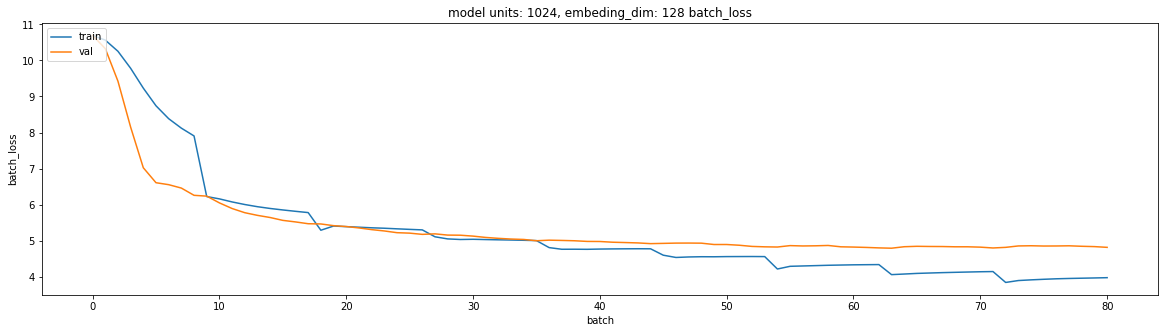

Epoch 1 Batch 0 Loss 10.6953Val Loss 10.6979
Epoch 1 Batch 100 Loss 10.4805Val Loss 10.1341


In [ ]:
epochs = 9

d_model = [128]
units_list = [1024]

for d in d_model:
  for u in units_list:
    exp_name = f'transformer d_model: {u}, embeding_dim: {d}'

    checkpoint_path = checkpoint_folder + '/cp-' + exp_name + ".ckpt"

    optimizer = tf.keras.optimizers.Adam(CustomSchedule(d))
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

    transformer = Transformer(num_layers=8,
                              d_model=d,
                              num_heads=8,
                              dff=u,
                              input_vocab_size=np.asarray(transformer_input_text_processor.vocabulary_size()),
                              target_vocab_size=np.asarray(transformer_output_text_processor.vocabulary_size()),
                              pe_input=1000,
                              pe_target=1000,
                              rate=0.1)
    ckpt = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer)
    ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_folder,checkpoint_name=checkpoint_path, max_to_keep=1)
    
    train_batch_loss, test_batch_loss = train_transformer(transformer,epochs, loss_object, optimizer,transformer_train,transformer_test,ckpt_manager)

    plot_loss_accuracy_metrics(train_batch_loss, test_batch_loss, f'units: {u}, embeding_dim: {d}')

Трансформер обучается быстрее (по времени, по сравнению с обычным seq2seq attention), но тем не менее если попробовать перевести с его помощью, то также не получить чего то осмысленного. Обучение seq2seq моделей оказалось очень затратным по ресурсам, из-за чего не получилось провести полноценные эксперименты.

Также, этот трансформер переобучился, что, исходя из опыта, свойственно для него (по крайней мере для этой Tensorflow реализации).  Для получения лучших результатов резонно было бы попробовать подобрать подходящую конфигурацию, или дообучить уже существующий.